# 1. Import and Install Dependencies

In [244]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib 
!pip install --upgrade mediapipe

In [245]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [246]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [247]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [248]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [249]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [250]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [251]:
draw_landmarks(frame, results)

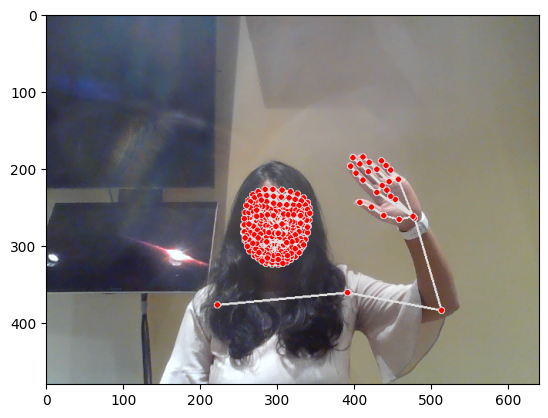

In [252]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [253]:
len(results.left_hand_landmarks.landmark)

21

In [254]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [255]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [256]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
# if results.face_landmarks 
# else np.zeros(1404)


In [257]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [258]:
result_test = extract_keypoints(results)

In [259]:
result_test

array([ 0.46682915,  0.5739041 , -0.68377912, ...,  0.        ,
        0.        ,  0.        ])

In [260]:
np.save('0', result_test)

In [261]:
np.load('0.npy')

array([ 0.46682915,  0.5739041 , -0.68377912, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [262]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('C:/Users/khema/Desktop/TrainLSTM/FinalDataFinal') 

# Actions that we try to detect
# actions = np.array(['hello', 'thanks', 'iloveyou'])
# actions = np.array(['I','Fine','How','You', 'Nice','Meet','Hello','Yes','No','Father','Mother','Thank you','I love you','All done'])
# actions = np.array(['Fine', 'Yes', 'All done'])
actions = np.array(['Hello', 'How', 'You', 'Nice', 'Meet', 'All Done'])



# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [263]:
# for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
#         except:
#             pass

for action in actions: 
    action_dir = os.path.join(DATA_PATH, action)
    
    # Check if the action directory exists, and if not, create it
    if not os.path.exists(action_dir):
        os.makedirs(action_dir)
    
    # Get the maximum sequence number in the action directory
    try:
        dir_contents = os.listdir(action_dir)
        if dir_contents:
            dirmax = np.max(np.array(dir_contents).astype(int))
        else:
            dirmax = 0
    except ValueError:
        dirmax = 0

    for sequence in range(1, no_sequences + 1):
        try: 
            os.makedirs(os.path.join(action_dir, str(dirmax + sequence)))
        except FileExistsError:
            # The directory already exists, you can handle it as needed
            pass


# 5. Collect Keypoint Values for Training and Testing

In [264]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [265]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [266]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [267]:
label_map = {label:num for num, label in enumerate(actions)}

In [268]:
label_map

{'Hello': 0, 'How': 1, 'You': 2, 'Nice': 3, 'Meet': 4, 'All Done': 5}

In [269]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [270]:
np.array(sequences).shape

(180, 30, 1662)

In [271]:
np.array(labels).shape

(180,)

In [272]:
X = np.array(sequences)

In [273]:
X.shape

(180, 30, 1662)

In [274]:
y = to_categorical(labels).astype(int)

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [276]:
y_test.shape

(9, 6)

# 7. Build and Train LSTM Neural Network

In [277]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.constraints import MaxNorm

In [278]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [279]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))

# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662), dropout=0.2, recurrent_dropout=0.2))
# model.add(BatchNormalization())
# model.add(LSTM(128, return_sequences=True, activation='tanh', dropout=0.2, recurrent_dropout=0.2))
# model.add(BatchNormalization())
# model.add(LSTM(64, return_sequences=False, activation='tanh', dropout=0.2))
# model.add(BatchNormalization())
# model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.5))
# model.add(Dense(actions.shape[0], activation='softmax'))



# model = Sequential()
# model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(30,1662), dropout=0.2, recurrent_dropout=0.2, kernel_constraint=MaxNorm(3)))
# model.add(BatchNormalization())
# model.add(LSTM(256, return_sequences=True, activation='tanh', dropout=0.3, recurrent_dropout=0.3, kernel_constraint=MaxNorm(3)))
# model.add(BatchNormalization())
# model.add(LSTM(128, activation='tanh', dropout=0.4, kernel_constraint=MaxNorm(3)))
# model.add(BatchNormalization())
# model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))  # For 3 actions

model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(30,1662), dropout=0.2, recurrent_dropout=0.2, kernel_constraint=MaxNorm(3)))
model.add(BatchNormalization())
model.add(LSTM(256, return_sequences=True, activation='tanh', dropout=0.3, recurrent_dropout=0.3, kernel_constraint=MaxNorm(3)))
model.add(BatchNormalization())
model.add(LSTM(128, activation='tanh', dropout=0.4, kernel_constraint=MaxNorm(3)))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # Updated for 6 actions


In [280]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [281]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
6/6 [==============================] - 14s 254ms/step - loss: 2.6108 - categorical_accuracy: 0.1813
Epoch 2/2000
6/6 [==============================] - 1s 240ms/step - loss: 2.3479 - categorical_accuracy: 0.2632
Epoch 3/2000
6/6 [==============================] - 1s 225ms/step - loss: 2.1640 - categorical_accuracy: 0.2749
Epoch 4/2000
6/6 [==============================] - 1s 228ms/step - loss: 1.9763 - categorical_accuracy: 0.2982
Epoch 5/2000
6/6 [==============================] - 1s 225ms/step - loss: 1.8595 - categorical_accuracy: 0.3684
Epoch 6/2000
6/6 [==============================] - 1s 224ms/step - loss: 1.6191 - categorical_accuracy: 0.4444
Epoch 7/2000
6/6 [==============================] - 1s 233ms/step - loss: 1.7979 - categorical_accuracy: 0.3860
Epoch 8/2000
6/6 [==============================] - 1s 230ms/step - loss: 1.5261 - categorical_accuracy: 0.4678
Epoch 9/2000
6/6 [==============================] - 1s 228ms/step - loss: 1.3970 - categorical_accuracy

In [282]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 30, 128)           916992    
                                                                 
 batch_normalization_9 (Bat  (None, 30, 128)           512       
 chNormalization)                                                
                                                                 
 lstm_20 (LSTM)              (None, 30, 256)           394240    
                                                                 
 batch_normalization_10 (Ba  (None, 30, 256)           1024      
 tchNormalization)                                               
                                                                 
 lstm_21 (LSTM)              (None, 128)               197120    
                                                                 
 batch_normalization_11 (Ba  (None, 128)              

# 8. Make Predictions

In [283]:
res = model.predict(X_test)

1/1 [==============================] - 1s 933ms/step


In [284]:
# actions[np.argmax(res[4])]
actions[np.argmax(res[1])]

'You'

In [285]:
actions[np.argmax(y_test[0])]

'Hello'

# 9. Save Weights

In [286]:
model.save('actionsFinalFinal.h5')

In [287]:
del model

In [288]:
model.load_weights('actionsFinalFinal.h5')

NameError: name 'model' is not defined

# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()